In [1]:
### configuration
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.linalg as la

%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
from SourceCode.ChangePointModelSourceCode import *

## Application 1 - Gaussian Mean-shift Model

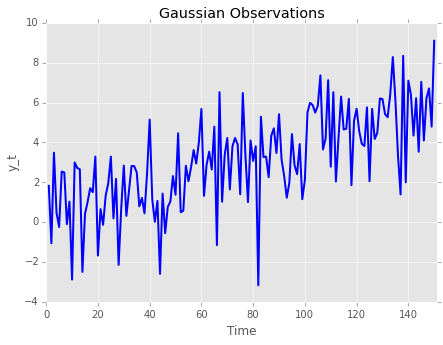

In [3]:
y = np.loadtxt('Data/data_gaussian')
n = len(y)
plt.figure(figsize=(7, 5))
plt.plot(np.arange(n) + 1, y, '-b', linewidth = 2)
plt.xlabel('Time')
plt.ylabel('y_t')
plt.xlim([0, 151])
plt.title('Gaussian Observations')

### Model Fitting and Comparisons

In [4]:
# MCEM
n, m = len(y), 1
theta_star, Ptran_star = mcem_update(y, m, family = "gaussian", tol = 0.01)

[ 0.3769  3.1432]
[ 1.2554  4.207 ]
[ 1.2362  4.1999]
[ 1.2411  4.2026]
Convergence Reached


In [5]:
# MCMC
vsim, burn = 7000, 1000
c, d = 2., 100.
Theta_p_1, F_lag_sum_1, F_sum_1, log_f_y_1, log_m_1 =  \ 
    model_fit(y, m, vsim, burn, theta_star, Ptran_star, c, d, family = "gaussian")

0
2000
4000
6000


In [14]:
# MCEM
n, m = len(y), 2
theta_star, Ptran_star = mcem_update(y, m, family = "gaussian", tol = 0.01)

[ 0.8891  1.4875  3.2308]
[ 1.1928  3.0755  5.1805]
[ 1.1769  3.0521  5.174 ]
[ 1.1803  3.0548  5.1799]
Convergence Reached


In [16]:
# MCMC
vsim, burn = 7000, 1000
c, d = 2., 100.
Theta_p_2, F_lag_sum_2, F_sum_2, log_f_y_2, log_m_2 =  \
    model_fit(y, m, vsim, burn, theta_star, Ptran_star, c, d, family = "gaussian")

0
2000
4000
6000


In [17]:
# MCEM
n, m = len(y), 3
theta_star, Ptran_star = mcem_update(y, m, family = "gaussian", tol = 0.01)

[ 0.3769  1.2306  1.4875  3.2308]
[ 1.0657  1.339   3.0779  5.1805]
[ 1.0747  1.2746  3.06    5.174 ]
[ 1.0871  1.296   3.0643  5.1799]
Convergence Reached


In [18]:
# MCMC
vsim, burn = 7000, 1000
c, d = 2., 100.
Theta_p_3, F_lag_sum_3, F_sum_3, log_f_y_3, log_m_3 =  \
    model_fit(y, m, vsim, burn, theta_star, Ptran_star, c, d, family = "gaussian")

0
2000
4000
6000


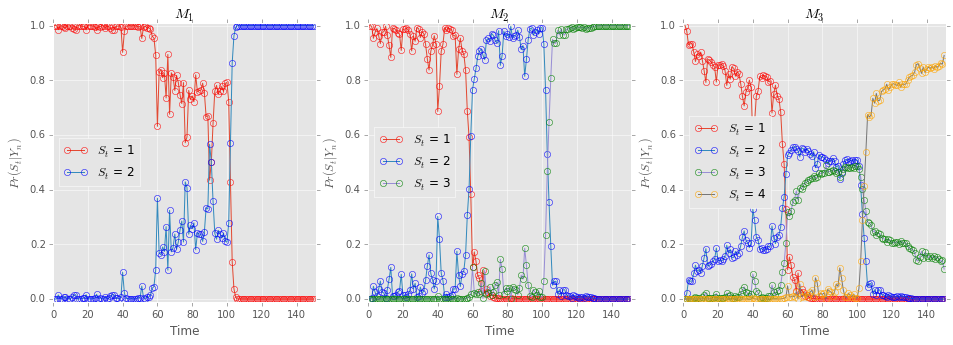

In [23]:
# Visualize change point for all models
time = np.arange(1, n + 1)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
PrS = F_sum_1 / float(vsim - burn)
plt.plot(time, PrS[:,0], "o-", label = "$S_t$ = 1", markerfacecolor = "none", markeredgecolor = "red")
plt.plot(time, PrS[:,1], "o-", label = "$S_t$ = 2", markerfacecolor = "none", markeredgecolor = "blue")
plt.xlim([0, 151])
plt.ylim([-0.01, 1.01])
plt.legend(loc = "best")
plt.xlabel("Time")
plt.ylabel("$Pr(S_t|Y_n)$")
plt.title("$M_1$")

plt.subplot(1, 3, 2)
PrS = F_sum_2 / float(vsim - burn)
plt.plot(time, PrS[:,0], "o-", label = "$S_t$ = 1", markerfacecolor = "none", markeredgecolor = "red")
plt.plot(time, PrS[:,1], "o-", label = "$S_t$ = 2", markerfacecolor = "none", markeredgecolor = "blue")
plt.plot(time, PrS[:,2], "o-", label = "$S_t$ = 3", markerfacecolor = "none", markeredgecolor = "green")
plt.xlim([0, 151])
plt.ylim([-0.01, 1.01])
plt.legend(loc = "best")
plt.xlabel("Time")
plt.ylabel("$Pr(S_t|Y_n)$")
plt.title("$M_2$")

plt.subplot(1, 3, 3)
PrS = F_sum_3 / float(vsim - burn)
plt.plot(time, PrS[:,0], "o-", label = "$S_t$ = 1", markerfacecolor = "none", markeredgecolor = "red")
plt.plot(time, PrS[:,1], "o-", label = "$S_t$ = 2", markerfacecolor = "none", markeredgecolor = "blue")
plt.plot(time, PrS[:,2], "o-", label = "$S_t$ = 3", markerfacecolor = "none", markeredgecolor = "green")
plt.plot(time, PrS[:,3], "o-", label = "$S_t$ = 4", markerfacecolor = "none", markeredgecolor = "orange")
plt.xlim([0, 151])
plt.ylim([-0.01, 1.01])
plt.legend(loc = "best")
plt.xlabel("Time")
plt.ylabel("$Pr(S_t|Y_n)$")
plt.title("$M_3$")

In [50]:
table_gaussian = np.array([log_f_y_1, log_f_y_2, log_f_y_3, log_m_1, log_m_2, log_m_3]).reshape(2,3)
rownames = ["$M_1$", "$M_2$", "$M_3$"]
colnames = ["$\log f(Y_n|\phi^{*})$", "$\log m(Y_n)$"]
pd.DataFrame(np.around(table_gaussian, 3), colnames, rownames)

,$M_1$,$M_2$,$M_3$
$\log f(Y_n|\phi^{*})$,-319.903,-310.712,-314.984
$\log m(Y_n)$,-328.052,-322.500,-327.570


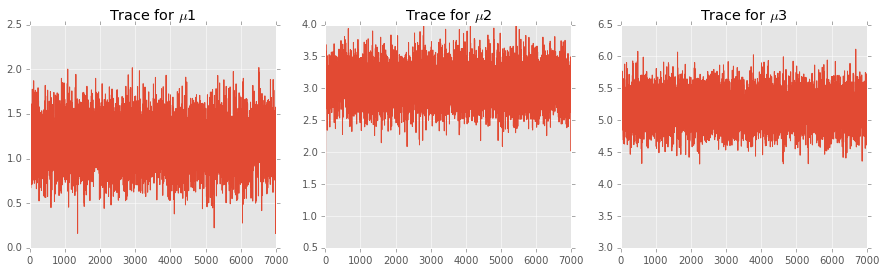

In [54]:
# MCMC diagnostics - Correct model
m = 2
plt.figure(figsize=(15, 4))
for i in range(m + 1):
    plt.subplot(1,3,i+1)
    plt.plot(Theta_p_2[:,i]);
    plt.title('Trace for $\mu$%d' % (i+1))

NameError: name 'Theta_p_1' is not defined

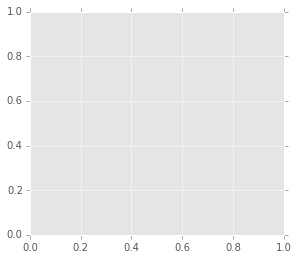

In [105]:
# MCMC diagnostics - Incorrect model
m = 1
plt.figure(figsize=(10, 4))
for i in range(m + 1):
    plt.subplot(1,2,i+1)
    plt.plot(Theta_p_1[:,i]);
    plt.title('Trace for $\mu$%d' % (i+1))

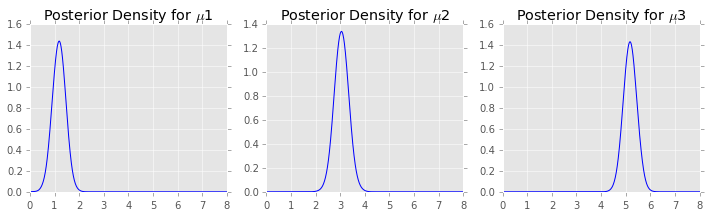

In [80]:
# density plots 
m = 2
plt.figure(figsize=(12, 3))
for i in range(m + 1):
    plt.subplot(1,3,i+1)
    density = stats.gaussian_kde(Theta_p_2[burn:,i])
    xs = np.linspace(0,8,800)
    density.covariance_factor = lambda : .5
    density._compute_covariance()
    plt.plot(xs,density(xs), 'b')
    plt.plot(xs, stats.normal.pdf(xs, c, d), 'g--')
    plt.title('Posterior Density for $\mu$%d' % (i+1))

In [81]:
table_estimate = np.concatenate((Theta_p_2[burn:,].mean(axis = 0), Theta_p_2[burn:,].std(axis = 0))).reshape(2,3)
rownames = ["$\mu_1$", "$\mu_2$", "$\mu_3$"]
colnames = ["Posterior Mean", "Posterior Standard Deviation"]
pd.DataFrame(np.around(table_estimate, 3), colnames, rownames)

,$\mu_1$,$\mu_2$,$\mu_3$
Posterior Mean,1.181,3.055,5.178
Posterior Standard Deviation,0.247,0.267,0.249


## Comparing Alternative Algorithms for Gaussian Time Series

### Barry and Hartigan (1993) - Product Partition Distributions

In [60]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [61]:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('bcp')
utils.install_packages('ecp')

rpy2.rinterface.NULL

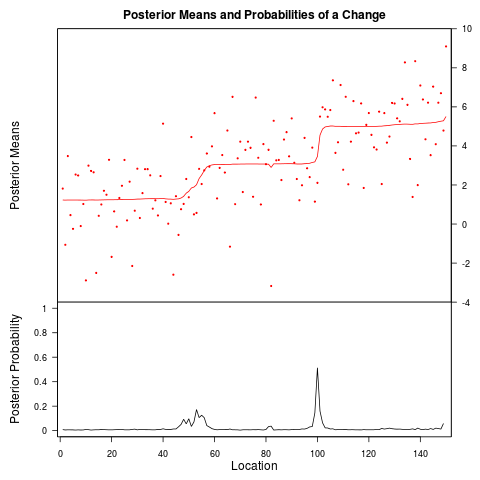

In [91]:
%%R -i y
library(bcp)
set.seed(1234)
fit = bcp(c(y), burnin = 1000, mcmc = 6000, return.mcmc = TRUE)
plot(fit)

In [92]:
%%R -i y
time = order(fit$posterior.prob, decreasing = TRUE)[c(2,1)]
pmeans = fit$posterior.mean
psamples = fit$mcmc.means[,-(1:1000)]
sd1 = sd(psamples[1:time[1], ])
sd2 = sd(psamples[(time[1]+1):time[2], ])
sd3 = sd(psamples[-(1:time[2]), ])
pstd = sqrt(fit$posterior.var)

cat("The estimated change points are at time", time, '\n')
cat("The posterior means for the three periods are", 
    round(c(mean(pmeans[1:time[1]]), mean(pmeans[(time[1]+1):time[2]]), mean(pmeans[-(1:time[2])])), 3), '\n')
cat("The posterior standard deviations for the three periods are (Monte Carlo)", 
    round(c(sd1, sd2, sd3), 3), '\n')
cat("The posterior standard deviations for the three periods are (Model Averaged)", 
    round(c(mean(pstd[1:time[1]]), mean(pstd[(time[1]+1):time[2]]), mean(pstd[-(1:time[2])])), 3), '\n')

The estimated change points are at time 53 100 
The posterior means for the three periods are 1.314 3.042 5.066 
The posterior standard deviations for the three periods are (Monte Carlo) 0.318 0.366 0.319 
The posterior standard deviations for the three periods are (Model Averaged) 0.197 0.256 0.25 


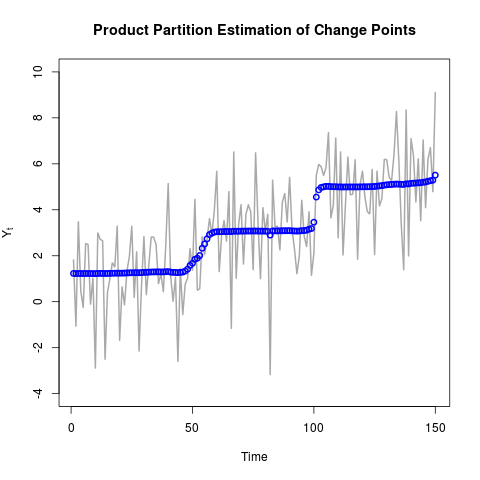

In [104]:
%%R -i y
plot(1:length(y), y, col = "darkgray", type = 'l', lwd = 2, ylim = c(-4, 10), xlab = "Time", 
     ylab = expression(Y[t]), main = "Product Partition Estimation of Change Points")
lines(1:length(y), c(fitted(fit)), type = 'p', col = "blue", lwd = 2)

### Matterson and James (2013) - Nonparametric Multiple Change Point Analysis

In [81]:
%%R -i y
library(ecp)
set.seed(1234)
fit = e.divisive(matrix(y, length(y), 1), R = 499)
cat("The number of change points found is", fit$k.hat-1, ", and they are at time", head(fit$estimates[-1], -1) - 1, '\n')

The number of change points found is 2 , and they are at time 53 100 


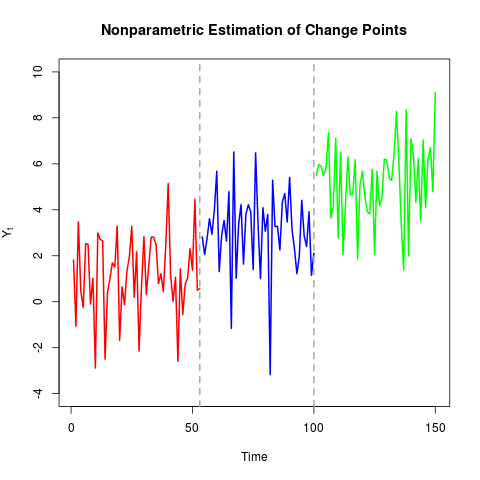

In [89]:
%%R -i y
state = fit$cluster
time = cumsum(c(sum(state == 1), sum(state == 2), sum(state == 3)))
plot(1:time[1], y[state == 1], type = 'l', col = "red", lwd = 2, xlim = c(1, length(state)), 
     ylim = c(-4, 10), xlab = "Time", ylab = expression(Y[t]), main = "Nonparametric Estimation of Change Points")
abline(v = time[1], lwd = 2, lty = 2, col = "darkgray")
lines((time[1] + 1):time[2], y[state == 2], type ='l', lwd = 2, col = "blue")
abline(v = time[2], lwd = 2, lty = 2, col = "darkgray")
lines((time[2] + 1):time[3], y[state == 3], type ='l', lwd = 2, col = "green")

## Application 2 - Poisson Data With Change Point 

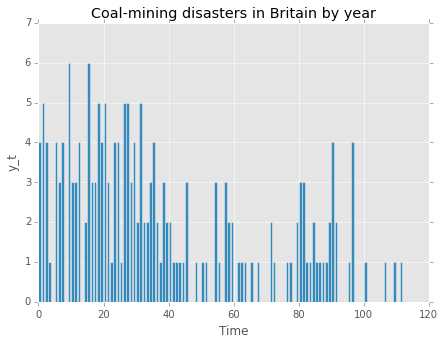

In [156]:
y = np.loadtxt('Data/data_poisson')
n = len(y)
plt.figure(figsize=(7, 5))
plt.ylim([0, 7])
plt.bar(np.arange(112), y)
plt.xlabel('Time')
plt.ylabel('y_t')
plt.title('Coal-mining disasters in Britain by year')

### Model Fitting and Comparisons

In [110]:
# M_0
from math import lgamma, factorial
n, m = len(y), 0
c, d = 2.0, 1.0
y_bar = y.mean()
log_f_y_0 = np.sum(stats.poisson.logpmf(y, mu = y_bar))
log_m_0 = c*np.log(d) - (c + np.sum(y))*np.log(n + d) - np.sum(np.log(np.vectorize(factorial)(y))) +  \
    lgamma(c + np.sum(y)) - lgamma(c)
print "Maximized log-likelihood for M_0 is approximated as %.3f." % log_f_y_0
print "Marginal likelihood for M_0 is approximated as %.3f." % log_m_0

Maximized log-likelihood for M_0 is approximated as -203.858.
Marginal likelihood for M_0 is approximated as -206.207.


In [111]:
# MCEM
n, m = len(y), 1
theta_star, Ptran_star = mcem_update(y, m, family = "poisson", tol = 0.01)

[ 2.8     1.6542]
[ 3.1092  0.9224]
[ 3.1089  0.9192]
[ 3.1118  0.921 ]
Convergence Reached


In [113]:
# MCMC
vsim, burn = 7000, 1000
c, d = 2., 1.
Theta_p_1, F_lag_sum_1, F_sum_1, log_f_y_1, log_m_1 =  \
    model_fit(y, m, vsim, burn, theta_star, Ptran_star, c, d, family = "poisson")

0
2000
4000
6000


In [114]:
n, m = len(y), 2
theta_star, Ptran_star = mcem_update(y, m, family = "poisson", tol = 0.01)

[ 4.3333  0.5     1.6542]
[ 3.2129  2.9632  0.9146]
[ 3.2012  2.9448  0.9106]
[ 3.22    2.9703  0.9177]
Convergence Reached


In [115]:
vsim, burn = 7000, 1000
c, d = 3., 1.
Theta_p_2, F_lag_sum_2, F_sum_2, log_f_y_2, log_m_2 =  \
    model_fit(y, m, vsim, burn, theta_star, Ptran_star, c, d, family = "poisson")

0
2000
4000
6000


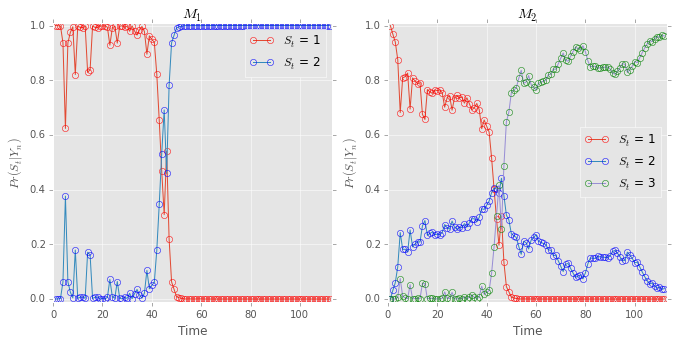

In [125]:
# Visualize change point for all models
time = np.arange(1, n + 1)
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
PrS = F_sum_1 / float(vsim - burn)
plt.plot(time, PrS[:,0], "o-", label = "$S_t$ = 1", markerfacecolor = "none", markeredgecolor = "red")
plt.plot(time, PrS[:,1], "o-", label = "$S_t$ = 2", markerfacecolor = "none", markeredgecolor = "blue")
plt.xlim([0, 113])
plt.ylim([-0.01, 1.01])
plt.legend(loc = "best")
plt.xlabel("Time")
plt.ylabel("$Pr(S_t|Y_n)$")
plt.title("$M_1$")

plt.subplot(1, 2, 2)
PrS = F_sum_2 / float(vsim - burn)
plt.plot(time, PrS[:,0], "o-", label = "$S_t$ = 1", markerfacecolor = "none", markeredgecolor = "red")
plt.plot(time, PrS[:,1], "o-", label = "$S_t$ = 2", markerfacecolor = "none", markeredgecolor = "blue")
plt.plot(time, PrS[:,2], "o-", label = "$S_t$ = 3", markerfacecolor = "none", markeredgecolor = "green")
plt.xlim([0, 113])
plt.ylim([-0.01, 1.01])
plt.legend(loc = "best")
plt.xlabel("Time")
plt.ylabel("$Pr(S_t|Y_n)$")
plt.title("$M_2$")

In [119]:
table_poisson = np.array([log_f_y_0, log_f_y_1, log_f_y_2, log_m_0, log_m_1, log_m_2]).reshape(2,3)
rownames = ["$M_0$", "$M_1$", "$M_2$"]
colnames = ["$\log f(Y_n|\phi^{*})$", "$\log m(Y_n)$"]
pd.DataFrame(np.around(table_poisson, 3), colnames, rownames)

,$M_0$,$M_1$,$M_2$
$\log f(Y_n|\phi^{*})$,-203.858,-176.903,-181.218
$\log m(Y_n)$,-206.207,-178.379,-180.627


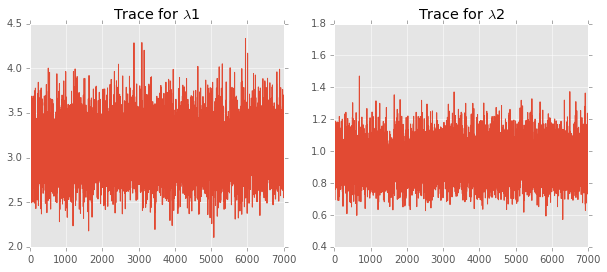

In [120]:
# MCMC diagnostics
m = 1
plt.figure(figsize=(10, 4))
for i in range(m + 1):
    plt.subplot(1,2,i+1)
    plt.plot(Theta_p_1[:,i]);
    plt.title('Trace for $\lambda$%d' % (i+1))

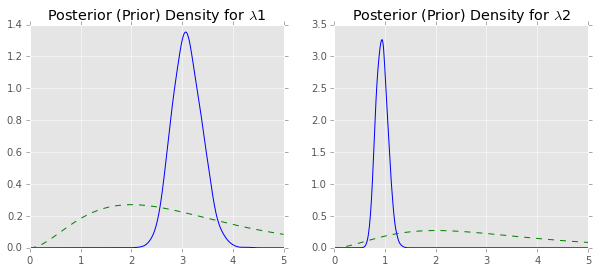

In [131]:
# density plots (reproduce the paper output)
plt.figure(figsize=(10, 4))
for i in range(m + 1):
    plt.subplot(1,2,i+1)
    density = stats.gaussian_kde(Theta_p_1[burn:,i])
    xs = np.linspace(0,5,500)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    plt.plot(xs,density(xs), 'b')
    plt.plot(xs, stats.gamma.pdf(xs, c, scale = 1.0/d), 'g--')
    plt.title('Posterior (Prior) Density for $\lambda$%d' % (i+1))

In [123]:
table_estimate = np.concatenate((Theta_p_1[burn:,].mean(axis = 0), Theta_p_1[burn:,].std(axis = 0))).reshape(2,2)
rownames = ["$\lambda_1$", "$\lambda_2$"]
colnames = ["Posterior Mean", "Posterior Standard Deviation"]
pd.DataFrame(np.around(table_estimate, 3), colnames, rownames)

,$\lambda_1$,$\lambda_2$
Posterior Mean,3.099,0.939
Posterior Standard Deviation,0.290,0.117


In [ ]:
# estimation of change points

## Comparing Alternative Algorithms for Gaussian Time Series

### Barry and Hartigan (1993) - Product Partition Distributions

In [132]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


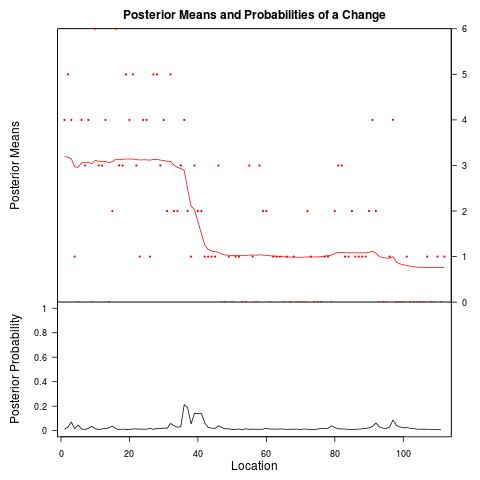

In [133]:
%%R -i y
library(bcp)
set.seed(1234)
fit = bcp(c(y), burnin = 1000, mcmc = 6000, return.mcmc = TRUE)
plot(fit)

In [139]:
%%R -i y
time = order(fit$posterior.prob, decreasing = TRUE)[1]
pmeans = fit$posterior.mean
psamples = fit$mcmc.means[,-(1:1000)]
sd1 = sd(psamples[1:time[1], ])
sd2 = sd(psamples[-(1:time[1]), ])
pstd = sqrt(fit$posterior.var)

cat("The estimated change points are at time", time, '\n')
cat("The posterior means for the three periods are", 
    round(c(mean(pmeans[1:time[1]]), mean(pmeans[-(1:time[1])])), 3), '\n')
cat("The posterior standard deviations for the three periods are (Monte Carlo)", 
    round(c(sd1, sd2), 3), '\n')
cat("The posterior standard deviations for the three periods are (Model Averaged)", 
    round(c(mean(pstd[1:time[1]]), mean(pstd[-(1:time[1])])), 3), '\n')

The estimated change points are at time 36 
The posterior means for the three periods are 3.087 1.051 
The posterior standard deviations for the three periods are (Monte Carlo) 0.263 0.408 
The posterior standard deviations for the three periods are (Model Averaged) 0.226 0.236 


[1] 112


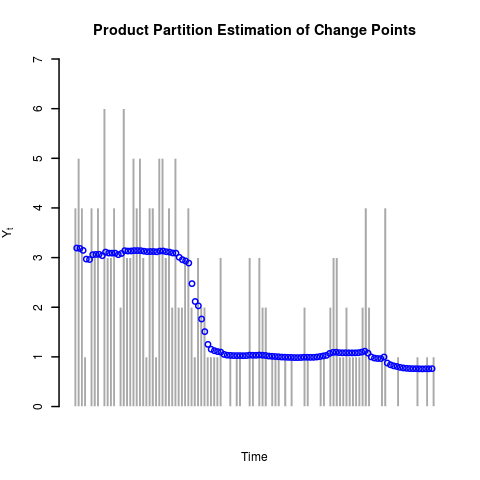

In [173]:
%%R -i y
barplot(y, col = "darkgray", width = 0.84, lwd = 2, xlim = c(0, 113), ylim = c(0, 7), xlab = "Time", 
     ylab = expression(Y[t]), main = "Product Partition Estimation of Change Points", border = "white")
lines(1:length(y), c(fitted(fit)), type = 'p', col = "blue", lwd = 2)
length(c(fitted(fit)))

### Matterson and James (2013) - Nonparametric Multiple Change Point Analysis

In [174]:
%%R -i y
library(ecp)
set.seed(1234)
fit = e.divisive(matrix(y, length(y), 1), R = 499)
cat("The number of change points found is", fit$k.hat-1, ", and they are at time", head(fit$estimates[-1], -1) - 1, '\n')

The number of change points found is 1 , and they are at time 36 


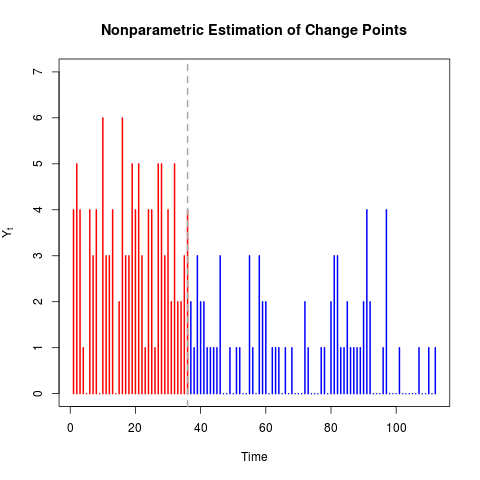

In [192]:
%%R -i y
state = fit$cluster
time = cumsum(c(sum(state == 1), sum(state == 2)))
plot(-1, xlim = c(1, length(state)), 
     ylim = c(0, 7), xlab = "Time", ylab = expression(Y[t]), main = "Nonparametric Estimation of Change Points")
for(i in 1:time[1]){
    segments(i,0, i,y[i], lwd = 2, col = "red")
}
abline(v = time[1], lwd = 2, lty = 2, col = "darkgray")
for(j in (time[1]+1):time[2]){
    segments(j,0, j,y[j], lwd = 2, col = "blue")
}